In [1]:
import pandas as pd
import numpy as np
import warnings
import mrmr
warnings.filterwarnings("ignore")

In [2]:
# Define the list of feature names
feature_names =  ['age', 'rank', 'height', 'weight', 'bmi', 'bp_s', 'bp_d', 'bp', 'map', 'smoker', 'alcohol', 'faam', 'eilp', 'chronicity', 'ttp', 'ttd', 'ttt', 'wait time', 'time_dg', 'co_morb', 'prior_injuries', 'prior_surgery', 'prior_courses']

# Read the feature data from a CSV file into a Pandas DataFrame
X = pd.read_csv('data//X.csv', header=None)

# Assign the feature names to the columns of the DataFrame
X.columns = feature_names

# Read the target variable (labels) from a CSV file into a Pandas DataFrame
y = pd.read_csv('data//y.csv', header=None)

# Assign a column name ('labels') to the target variable
y.columns = ['labels']

# Use the mrmr_classif function to select features based on minimum redundancy maximum relevance
selected_features = mrmr.mrmr_classif(X, y.iloc[:, 0].values, K=X.shape[1])

# Initialize a list with the first selected feature
valid_features = [selected_features[0]]

# Iterate over the remaining selected features and check for correlation with already selected features
for feat in range(1, X.shape[1]):
    # Check if the absolute correlation between the current feature and the valid features is greater than 0.5
    if any(abs(X[valid_features + [selected_features[feat]]].corr().iloc[:-1, -1].values) > 0.5):
        # If the correlation is greater than 0.5, skip adding the feature to the valid features list
        pass
    else:
        # If the correlation is not greater than 0.5, add the feature to the valid features list
        valid_features.append(selected_features[feat])

# Create a new DataFrame (X_) containing only the selected valid features
X_ = X[valid_features].copy()

100%|██████████| 23/23 [00:03<00:00,  5.95it/s]


In [3]:
from sklearn.linear_model import LogisticRegression
from AITIA.uncertainty_system import UncertaintyEstimator
from interrogation_analysis import UncertaintyExplainer

In [4]:
model = LogisticRegression(class_weight='balanced',C=0.25,penalty='l2',solver='liblinear')

In [5]:
uncertainty_estimator = UncertaintyEstimator(model, kneighbors_n=5, max_depth=4, rdos_neighbors=5, balanced=True, categorical_idx=[2,3,7,9,10,14,15])
uncertainty_estimator.fit(X_.values, y['labels'].values)
uncertainty = uncertainty_estimator.predict(X_.values)

Explaining Instances: 100%|██████████| 126/126 [02:22<00:00,  1.13s/instance]


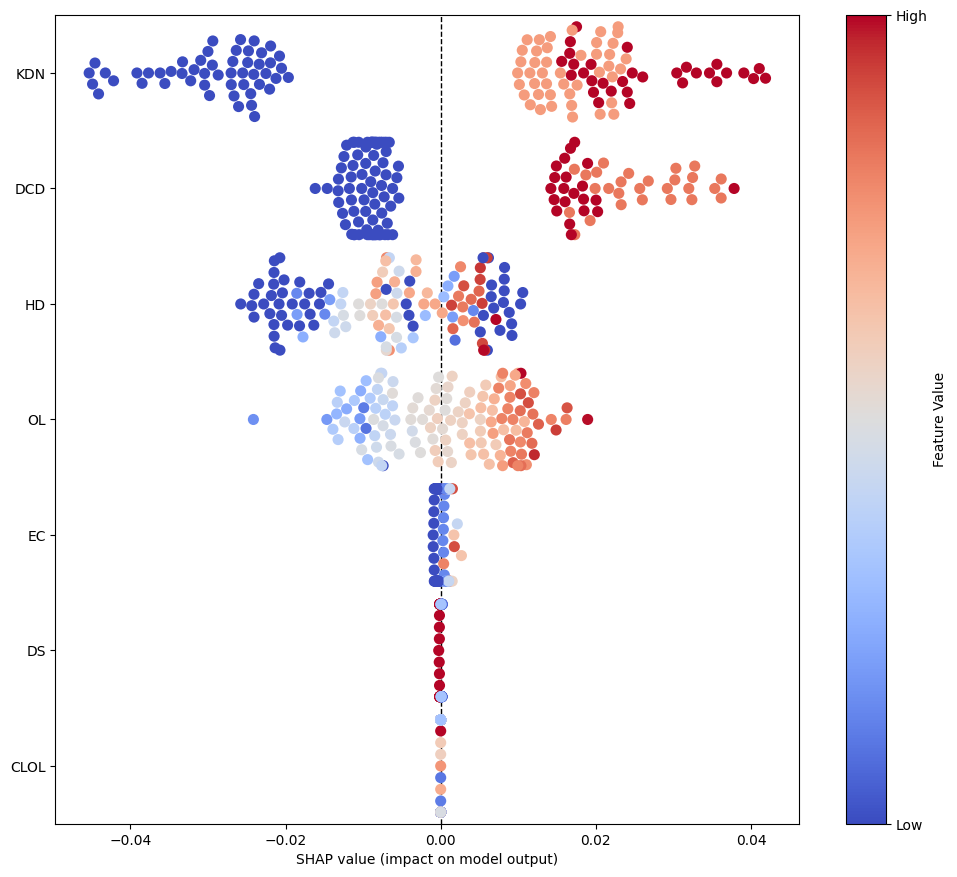

In [6]:
uncertainty_explainer = UncertaintyExplainer(uncertainty_system=uncertainty_estimator, M=500)
uncertainty_explainer.explain(X_.values, X_.values,feature_names=list(X_.columns))

Explaining Instances:   0%|          | 0/1 [00:00<?, ?instance/s]

Explaining Instances: 100%|██████████| 1/1 [00:01<00:00,  1.15s/instance]


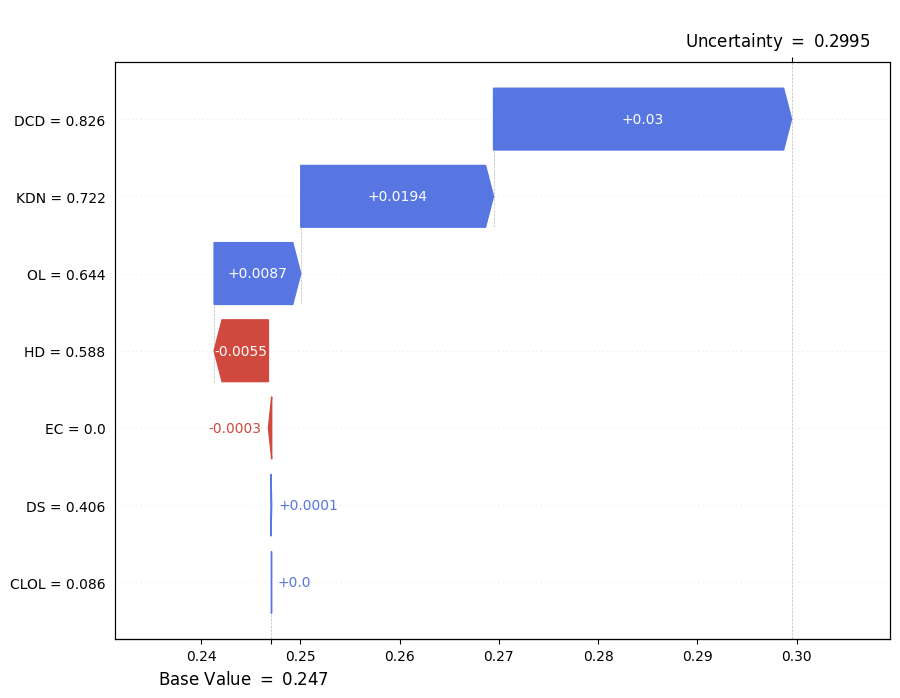

In [16]:
uncertainty_explainer.explain(X_.values, X_.values[[17],:],feature_names=list(X_.columns))

Explaining Instances: 100%|██████████| 1/1 [00:01<00:00,  1.51s/instance]


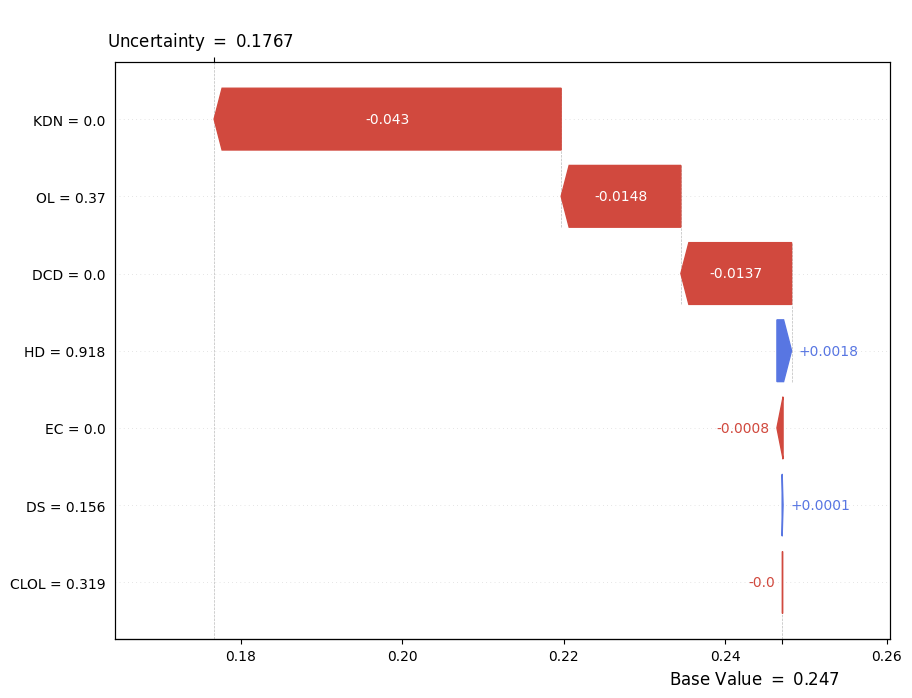

In [18]:
uncertainty_explainer.explain(X_.values, X_.values[[0],:],feature_names=list(X_.columns))